In [1]:
import numpy as np
import pandas as pd

import math

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
df1 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link7.csv')
df2 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link2.csv')
df3 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link3.csv')
df4 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link4.csv')
df5 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link5.csv')
df6 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link6.csv')
df7 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link1.csv')
df8 = pd.read_csv('C:\\Users\\Luxuss\\Desktop\\SharedFolder\\Project\\RYU\\link8.csv')

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df2,df1,df7,df6,df8,df4,df5,df3])
df.reset_index(inplace=True)
df

,index,Timestamp,Tx_Packet,Rx_Packet,Dropped,BW_Utilization
0,0,2020-11-06 04:30:24,33,34,0,4.584070e+04
1,1,2020-11-06 04:31:21,35,33,0,4.626071e+04
2,2,2020-11-06 04:35:26,40,5,0,4.150660e+05
3,3,2020-11-06 04:35:27,143,1,0,4.224566e+06
4,4,2020-11-06 04:35:28,142,0,0,4.165482e+06
...,...,...,...,...,...,...
3401,120,2020-11-06 04:39:41,327,274,0,8.398220e+05
3402,121,2020-11-06 04:39:41,217,0,0,3.031080e+05
3403,122,2020-11-06 04:39:41,304,3,0,4.266560e+05
3404,123,2020-11-06 04:39:42,913,1,0,1.280100e+06


In [3]:
df = df[['BW_Utilization']]
df

,BW_Utilization
0,4.584070e+04
1,4.626071e+04
2,4.150660e+05
3,4.224566e+06
4,4.165482e+06
...,...
3401,8.398220e+05
3402,3.031080e+05
3403,4.266560e+05
3404,1.280100e+06


In [4]:
scaler = MinMaxScaler(feature_range=(0,1))
df = scaler.fit_transform(np.array(df).reshape(-1,1))

df

array([[0.00298178],
       [0.00303186],
       [0.04701144],
       ...,
       [0.04839353],
       [0.15016566],
       [0.09962279]])

In [5]:
df = pd.DataFrame(data = df, 
                  columns = ['BW_Utilization']) 
df

,BW_Utilization
0,0.002982
1,0.003032
2,0.047011
3,0.501290
4,0.494244
...,...
3401,0.097663
3402,0.033661
3403,0.048394
3404,0.150166


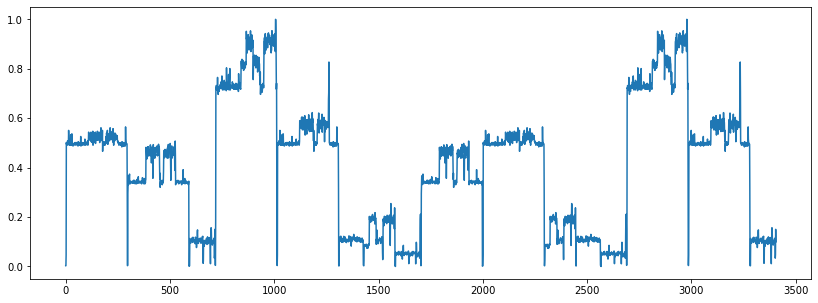

In [6]:
plt.figure(figsize =(14,5))
plt.plot(df)

In [7]:
future_days = 652

In [8]:
df['Prediction'] = df[['BW_Utilization']].shift(-future_days)
df

,BW_Utilization,Prediction
0,0.002982,0.105737
1,0.003032,0.103233
2,0.047011,0.115641
3,0.501290,0.120118
4,0.494244,0.117776
...,...,...
3401,0.097663,NaN
3402,0.033661,NaN
3403,0.048394,NaN
3404,0.150166,NaN


In [9]:
x = np.array(df.drop(['Prediction'],1))[:-future_days]
x

array([[0.00298178],
       [0.00303186],
       [0.04701144],
       ...,
       [0.73213439],
       [0.73512777],
       [0.7769278 ]])

In [10]:
y = np.array(df['Prediction'])[:-future_days]
y

array([0.10573691, 0.10323341, 0.11564052, ..., 0.04839353, 0.15016566,
       0.09962279])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25)

In [12]:
# RandomForest Regressor model
rfg = RandomForestRegressor().fit(x_train, y_train)

# Multilayer Perceptron Regressor model
mlp = MLPRegressor(hidden_layer_sizes=(100,50,),  activation='relu', solver='adam',    alpha=0.001,batch_size=64,
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=1000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.5,
               nesterovs_momentum=True, early_stopping=True, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08).fit(x_train, y_train)

In [13]:
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)

#convert to np array
x_future = np.array(x_future)
x_future

array([[0.49425102],
       [0.49777386],
       [0.50833525],
       [0.49072817],
       [0.49425102],
       [0.5048124 ],
       [0.5153881 ],
       [0.54356372],
       [0.52594948],
       [0.53651802],
       [0.5118581 ],
       [0.5118581 ],
       [0.51891094],
       [0.51538094],
       [0.52947233],
       [0.52242664],
       [0.52594948],
       [0.52595664],
       [0.54356372],
       [0.5048124 ],
       [0.50833525],
       [0.52594948],
       [0.52595664],
       [0.51538094],
       [0.50128956],
       [0.5118581 ],
       [0.53651802],
       [0.54709372],
       [0.49072102],
       [0.51890379],
       [0.53651802],
       [0.53299518],
       [0.50129671],
       [0.52242664],
       [0.54005089],
       [0.51538094],
       [0.5153881 ],
       [0.52594948],
       [0.51538094],
       [0.54359377],
       [0.49778388],
       [0.53651802],
       [0.51890379],
       [0.52594948],
       [0.5118581 ],
       [0.53300233],
       [0.5118581 ],
       [0.536

In [14]:
rfg_prediction = rfg.predict(x_future)
print(rfg_prediction)
print()

mlp_prediction = mlp.predict(x_future)
print(mlp_prediction)

[0.51230426 0.47468476 0.66769616 0.43344126 0.51230426 0.67909471
 0.71442312 0.75343202 0.81536504 0.60080029 0.69112017 0.69112017
 0.8970588  0.78264751 0.84445363 0.76643877 0.81536504 0.64311945
 0.75343202 0.67909471 0.66769616 0.81536504 0.64311945 0.78264751
 0.38666943 0.69112017 0.60080029 0.73007553 0.58232795 0.74593041
 0.60080029 0.58675013 0.66079269 0.76643877 0.82965218 0.78264751
 0.71442312 0.81536504 0.78264751 0.64756355 0.7035656  0.60080029
 0.74593041 0.81536504 0.69112017 0.73798905 0.69112017 0.60080029
 0.76643877 0.73007553 0.69112017 0.74593041 0.58675013 0.69112017
 0.64523296 0.82202602 0.78264751 0.75343202 0.73798905 0.60080029
 0.38666943 0.81536504 0.69112017 0.60080029 0.64311945 0.78264751
 0.72556004 0.76643877 0.72353094 0.75791507 0.76643877 0.60080029
 0.75559518 0.72340536 0.69999825 0.51230426 0.66079269 0.47468476
 0.58232795 0.66079269 0.51230426 0.45977047 0.58232795 0.51230426
 0.47468476 0.58232795 0.66079269 0.51230426 0.66079269 0.5997

In [15]:
predictions = rfg_prediction

valid = df[x.shape[0]:] #x.shape(0) = 1233
valid['Prediction'] = predictions

valid

C:\Users\Luxuss\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BW_Utilization,Prediction
2754,0.726169,0.512304
2755,0.714217,0.474685
2756,0.726162,0.667696
2757,0.753045,0.433441
2758,0.779914,0.512304
...,...,...
3401,0.097663,0.083153
3402,0.033661,0.109356
3403,0.048394,0.098272
3404,0.150166,0.099483


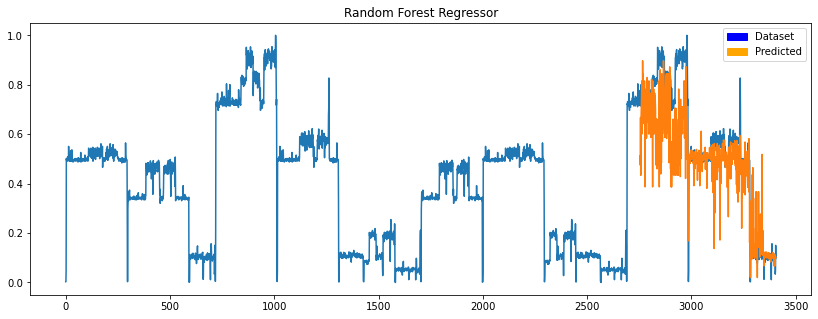

In [16]:
plt.figure(figsize=(14,5))
plt.title('Random Forest Regressor')
plt.plot(df['BW_Utilization'])
plt.plot(valid[['Prediction']])
blue = mpatches.Patch(color='blue', label='Dataset')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

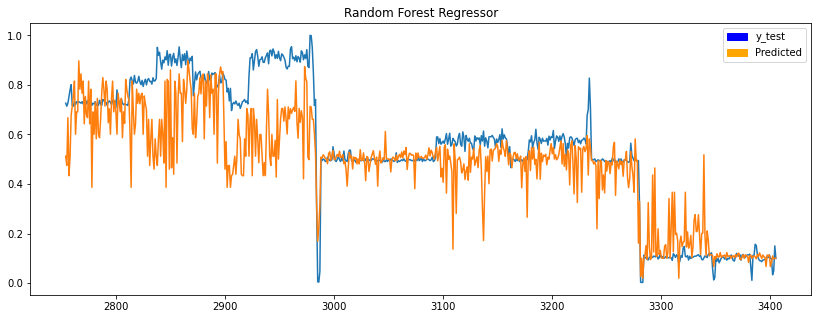

In [17]:
plt.figure(figsize=(14,5))
plt.title('Random Forest Regressor')
plt.plot(valid[['BW_Utilization','Prediction']])
blue = mpatches.Patch(color='blue', label='y_test')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

In [18]:
math.sqrt(mean_squared_error(y_test[-future_days:], rfg_prediction))

0.3389741621789276

In [19]:
mean_absolute_error(y_test[-future_days:], rfg_prediction)

0.27232851354524906

In [20]:
predictions = mlp_prediction

valid = df[x.shape[0]:] #x.shape(0) = 1233
valid['Prediction'] = predictions

valid

C:\Users\Luxuss\anaconda3\envs\tf2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,BW_Utilization,Prediction
2754,0.726169,0.505666
2755,0.714217,0.506307
2756,0.726162,0.507715
2757,0.753045,0.504890
2758,0.779914,0.505666
...,...,...
3401,0.097663,0.251790
3402,0.033661,0.236188
3403,0.048394,0.247892
3404,0.150166,0.243984


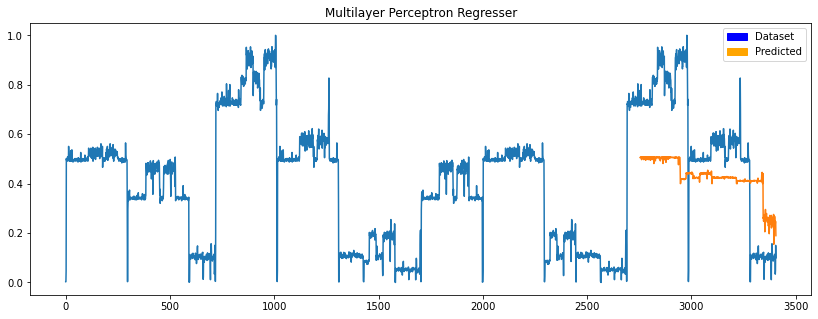

In [21]:
plt.figure(figsize=(14,5))
plt.title('Multilayer Perceptron Regresser')
plt.plot(df['BW_Utilization'])
plt.plot(valid[['Prediction']])
blue = mpatches.Patch(color='blue', label='Dataset')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

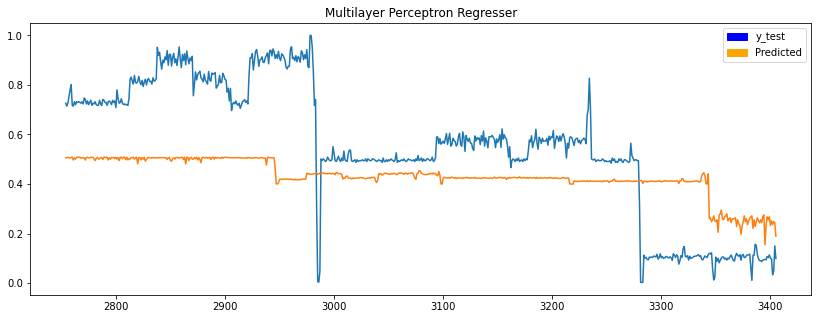

In [22]:
plt.figure(figsize=(14,5))
plt.title('Multilayer Perceptron Regresser')
plt.plot(valid[['BW_Utilization','Prediction']])
blue = mpatches.Patch(color='blue', label='y_test')
orange = mpatches.Patch(color='orange', label='Predicted')
plt.legend(handles=[blue, orange])

plt.show()

In [23]:
math.sqrt(mean_squared_error(y_test[-future_days:],mlp_prediction))

0.27411321283509416

In [24]:
mean_absolute_error(y_test[-future_days:], mlp_prediction)

0.22931954885955674